In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('F:\My Project\E-mail Spam\Dataset\emails.csv')

In [3]:
df.shape

(5728, 2)

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Data cleaning

In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.duplicated().sum()

33

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
text = (' '.join(df['text']))

# Exploratory data analysis

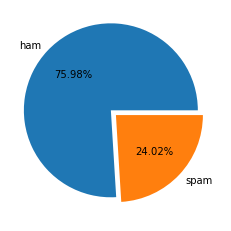

In [10]:
plt.pie(df['spam'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f%%', explode = [0.08,0])
plt.show()

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rutton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rutton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
## Number of Characters
df['num_characters'] = df['text'].apply(len)

## Number of Words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

## Number of Sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,9
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,5


In [13]:
##ham

df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,16.097065
std,1965.016383,407.227757,28.170659
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,6.000000
50%,1122.000000,240.000000,11.000000
75%,2037.500000,440.500000,19.000000
max,43952.000000,8479.000000,1229.000000


In [14]:
##spam

df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,15.206871
std,2271.372893,451.623124,21.143714
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,5.000000
50%,693.500000,141.000000,9.000000
75%,1250.250000,252.000000,16.000000
max,28432.000000,6131.000000,329.000000


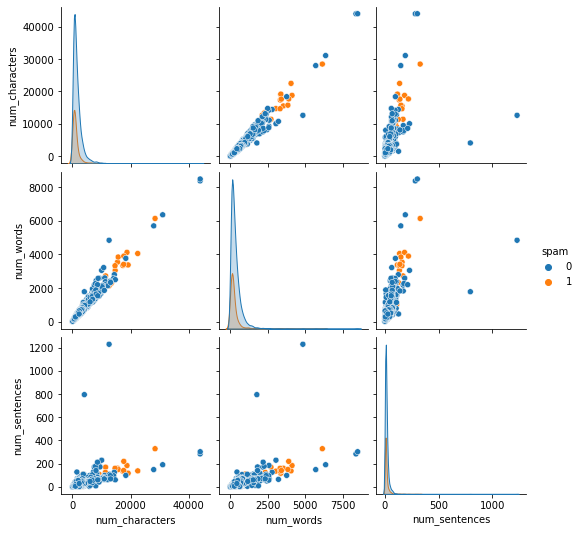

In [15]:
sns.pairplot(df,hue='spam')
plt.show()

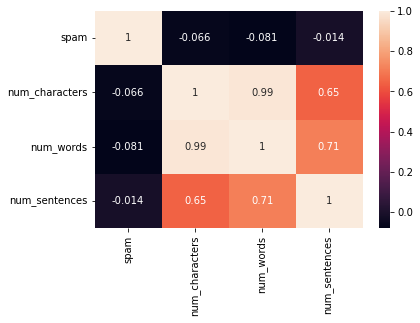

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='spam', ylabel='num_characters'>

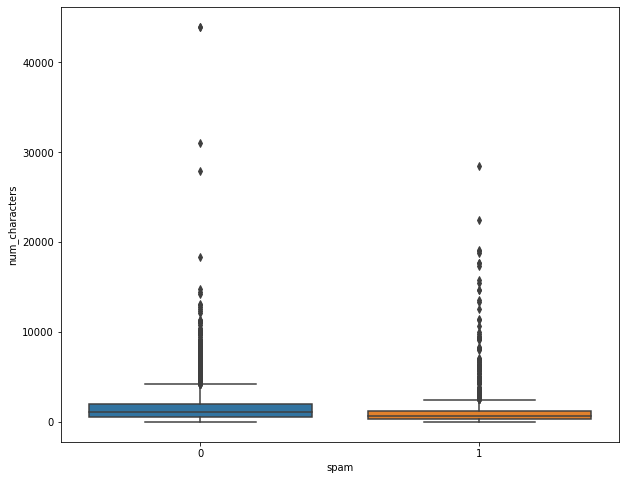

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='spam',y='num_characters',data = df)

# Data Preprocessing

In [18]:
from nltk.corpus import stopwords
import string
import re

In [19]:
def processing(email_text):
    email_text = re.sub(r'^\W*\w+\W*', '', email_text)
    email_text = nltk.word_tokenize(email_text.lower())
    sms = []
    for i in email_text:
        if i.isalnum():
            sms.append(i)
            
    email_text = sms[:]
    sms.clear()
    
    for i in email_text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            sms.append(i)
            
    return " ".join(sms)

In [20]:
df['processing_text'] = df['text'].apply(processing)

In [21]:
df.head()

,text,spam,num_characters,num_words,num_sentences,processing_text
0,Subject: naturally irresistible your corporate...,1,1484,325,9,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,unbelievable new homes made easy im wanting sh...
3,Subject: 4 color printing special request add...,1,500,99,5,4 color printing special request additional in...
4,"Subject: do not have money , get software cds ...",1,235,53,5,money get software cds software compatibility ...


In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=800,min_font_size=10)

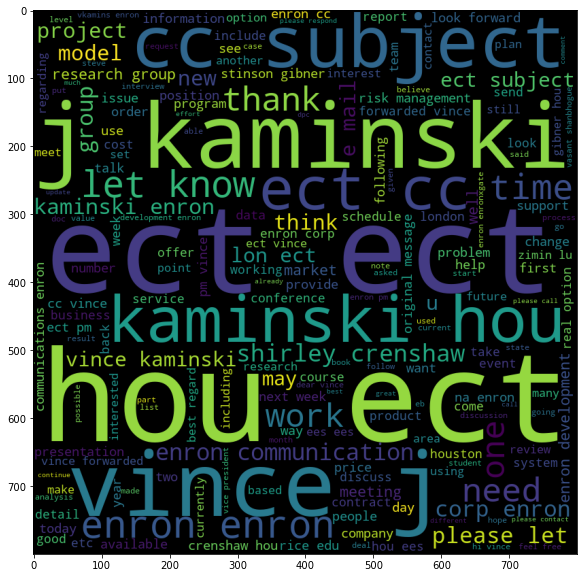

(0.0, 1.0, 0.0, 1.0)

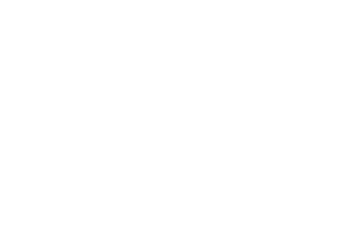

In [23]:
## Ham WordCloud
wordcloud_ham = wordcloud.generate(df[df['spam'] == 0]['processing_text'].str.cat(sep = " "))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud_ham)
plt.show()
plt.axis('off')

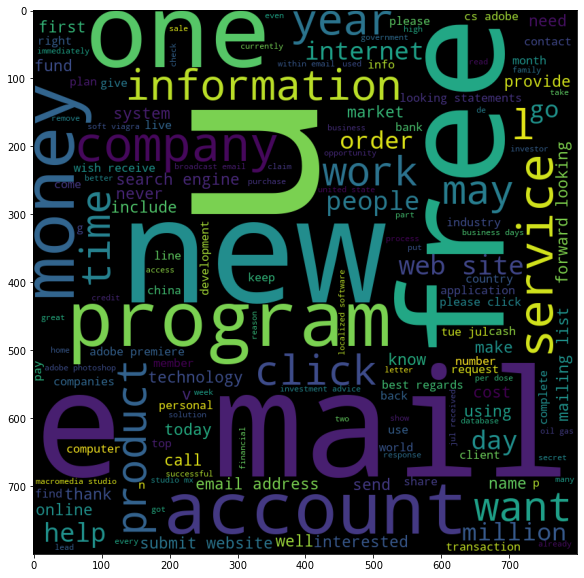

(0.0, 1.0, 0.0, 1.0)

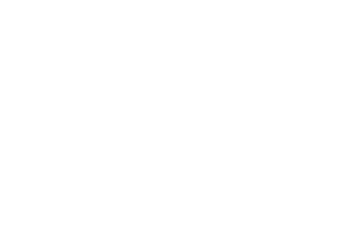

In [24]:
## spam WordCloud
wordcloud_spam = wordcloud.generate(df[df['spam'] == 1]['processing_text'].str.cat(sep = " "))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud_spam)
plt.show()
plt.axis('off')

In [25]:
## Converting Spam Messages to List of Words
x = df[df['spam'] == 1]['processing_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

173262

In [26]:
## Counting Top 50 Words from spam messages
from collections import Counter
spam_top_words = pd.DataFrame(Counter(spam_msg_word_list).most_common(50))

C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


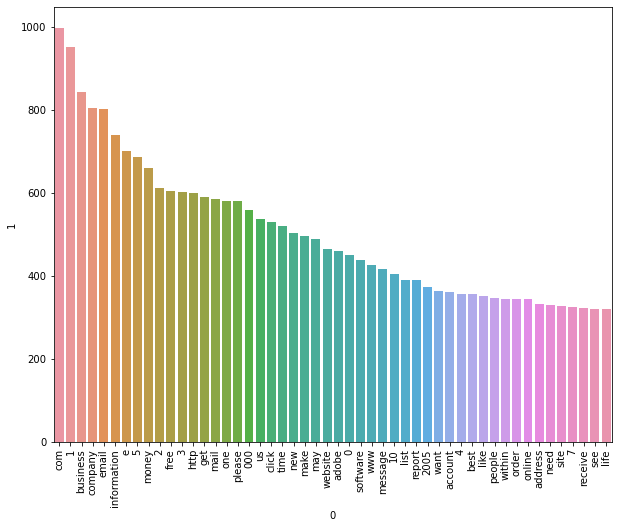

In [27]:
## Visualising it on the Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(spam_top_words[0],spam_top_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [28]:
## List of the Total Ham Words
ham_msg_list = df[df['spam'] == 0]['processing_text'].tolist()
ham_msg_word_list = []

for i in ham_msg_list:
    for j in i.split():
        ham_msg_word_list.append(j)

In [29]:
## Converting Most Comman 50 WOrds to DataFrame
ham_top_words = pd.DataFrame(Counter(ham_msg_word_list).most_common(50))
ham_top_words.head()

,0,1
0,enron,13329
1,ect,11410
2,vince,8468
3,hou,5567
4,2000,4932


C:\Users\Rutton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


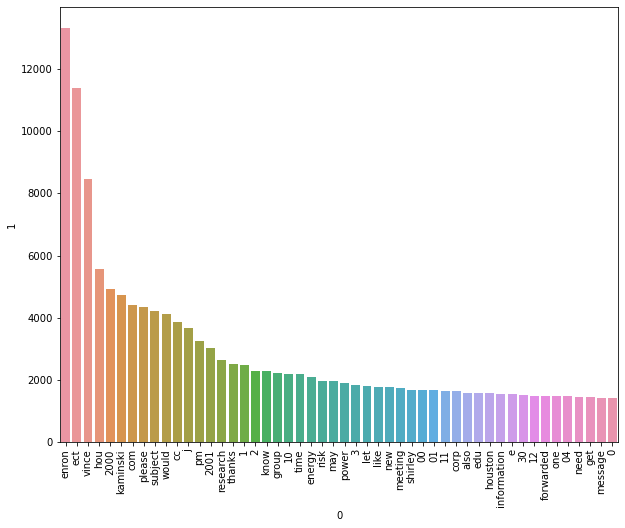

In [30]:
## making barplot og ham words
plt.figure(figsize=(10,8))
sns.barplot(ham_top_words[0],ham_top_words[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model

In [31]:
#Convert text to Vectors Using Bag of Words Technique
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [32]:
X = tf.fit_transform(df['processing_text']).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12002618, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
y = np.array(df['spam'])
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [35]:
X_train.shape

(3986, 3000)

# Naive Bayes Classifier
### Gaussian, Bernouli, Multinomial

In [36]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [37]:
def model_scoring(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    con_matrix = confusion_matrix(y_test,pred)
    pre_score = precision_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    return acc_score,con_matrix,pre_score,f1score

In [38]:
model_scoring(gnb,X_train,X_test,y_train,y_test)

(0.967817437097718,
 array([[1290,    8],
        [  47,  364]], dtype=int64),
 0.978494623655914,
 0.929757343550447)

In [39]:
model_scoring(bnb,X_train,X_test,y_train,y_test)

(0.949093036863663,
 array([[1213,   85],
        [   2,  409]], dtype=int64),
 0.8279352226720648,
 0.9038674033149172)

In [40]:
model_scoring(mnb,X_train,X_test,y_train,y_test)

(0.9789350497366881,
 array([[1287,   11],
        [  25,  386]], dtype=int64),
 0.9722921914357683,
 0.9554455445544555)

# SVM Classfier

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel='sigmoid',gamma=1.0, probability = True, random_state = 2)

In [43]:
model_scoring(svc,X_train,X_test,y_train,y_test)

(0.9900526623756583,
 array([[1293,    5],
        [  12,  399]], dtype=int64),
 0.9876237623762376,
 0.9791411042944785)

# Decision Tree Classfier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

In [45]:
model_scoring(dtc,X_train,X_test,y_train,y_test)

(0.9139847864248098,
 array([[1160,  138],
        [   9,  402]], dtype=int64),
 0.7444444444444445,
 0.8454258675078865)

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

In [47]:
model_scoring(rfc,X_train,X_test,y_train,y_test)

(0.9859566998244588,
 array([[1282,   16],
        [   8,  403]], dtype=int64),
 0.9618138424821002,
 0.9710843373493976)

# XGBoost Classifier

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

C:\Users\Rutton\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [49]:
model_scoring(xgb,X_train,X_test,y_train,y_test)

C:\Users\Rutton\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:56:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9859566998244588,
 array([[1279,   19],
        [   5,  406]], dtype=int64),
 0.9552941176470588,
 0.9712918660287081)

# Voting Classfier

In [90]:
# Improve Performance
from sklearn.ensemble import VotingClassifier

In [97]:
# Use Ensemle technique like Voting Classifier
voting1 = VotingClassifier(estimators=[('svc',mnb),('rfc',rfc)],voting='soft')
voting1.fit(X_train,y_train)

VotingClassifier(estimators=[('svc', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [98]:
def voting_model(model,X_train,X_test,y_train,y_test):
    
    pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    con_matrix = confusion_matrix(y_test,pred)
    pre_score = precision_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    return acc_score,con_matrix,pre_score,f1score

In [99]:
voting_model(voting1,X_train,X_test,y_train,y_test)

(0.9906377998829725,
 array([[1292,    6],
        [  10,  401]], dtype=int64),
 0.9852579852579852,
 0.980440097799511)

In [104]:
voting2 = VotingClassifier(estimators=[('svc',mnb),('rfc',rfc),('xgb',xgb)],voting='soft')
voting2.fit(X_train,y_train)
voting_model(voting2,X_train,X_test,y_train,y_test)

C:\Users\Rutton\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9900526623756583,
 array([[1287,   11],
        [   6,  405]], dtype=int64),
 0.9735576923076923,
 0.9794437726723096)

In [106]:
voting3 = VotingClassifier(estimators=[('svc',mnb),('rfc',rfc),('xgb',xgb),('mnb',mnb)],voting='soft')
voting3.fit(X_train,y_train)
voting_model(voting3,X_train,X_test,y_train,y_test)

C:\Users\Rutton\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9912229373902867,
 array([[1290,    8],
        [   7,  404]], dtype=int64),
 0.9805825242718447,
 0.9817739975698663)